importing libraries 

In [18]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from datasist.structdata import detect_outliers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



reading data

In [19]:
cars = pd.read_csv('cars.csv')
cars.head()

C:\Users\Kyrillos\AppData\Local\Temp\ipykernel_14880\1501548697.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  cars = pd.read_csv('cars.csv')


,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
0,alfa-romeo,GTV,red,1995,1300.0,201,Manual,Petrol,10.9,160500.0
1,alfa-romeo,164,black,1995,24900.0,260,Manual,Petrol,6.6,190000.0
2,alfa-romeo,Spider,black,1995,5900.0,150,Automatic,Petrol,6.6,129000.0
3,alfa-romeo,Spider,black,1995,4900.0,150,Manual,Petrol,9.5,189500.0
4,alfa-romeo,164,red,1996,17950.0,179,Manual,Petrol,7.2,96127.0


In [20]:
cars = pd.read_csv('cars.csv', low_memory=False)

getting data information

In [21]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243605 entries, 0 to 243604
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     243605 non-null  object 
 1   model                     243605 non-null  object 
 2   color                     243605 non-null  object 
 3   year                      243605 non-null  int64  
 4   price_in_euro             243605 non-null  float64
 5   power_ps                  243605 non-null  int64  
 6   transmission_type         243605 non-null  object 
 7   fuel_type                 243605 non-null  object 
 8   fuel_consumption_l_100km  243605 non-null  float64
 9   mileage_in_km             243605 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 18.6+ MB


In [22]:
cars['mileage_in_km'] = pd.to_numeric(cars['mileage_in_km'])

ValueError: Unable to parse string "8.000 km" at position 54733

In [23]:
cars['mileage_in_km'] = cars['mileage_in_km'].str.replace(' km','')

In [24]:
cars['mileage_in_km'] = pd.to_numeric(cars['mileage_in_km'])/1000

In [25]:
cars

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
0,alfa-romeo,GTV,red,1995,1300.0,201,Manual,Petrol,10.9,160.500
1,alfa-romeo,164,black,1995,24900.0,260,Manual,Petrol,6.6,190.000
2,alfa-romeo,Spider,black,1995,5900.0,150,Automatic,Petrol,6.6,129.000
3,alfa-romeo,Spider,black,1995,4900.0,150,Manual,Petrol,9.5,189.500
4,alfa-romeo,164,red,1996,17950.0,179,Manual,Petrol,7.2,96.127
...,...,...,...,...,...,...,...,...,...,...
243600,volvo,XC40,white,2023,57990.0,261,Automatic,Hybrid,3.5,1.229
243601,volvo,XC90,white,2023,89690.0,235,Automatic,Diesel,7.6,4.900
243602,volvo,V60,white,2023,61521.0,197,Automatic,Diesel,4.7,1.531
243603,volvo,XC40,white,2023,57890.0,179,Automatic,Hybrid,3.5,1.500


In [26]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243605 entries, 0 to 243604
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   brand                     243605 non-null  object 
 1   model                     243605 non-null  object 
 2   color                     243605 non-null  object 
 3   year                      243605 non-null  int64  
 4   price_in_euro             243605 non-null  float64
 5   power_ps                  243605 non-null  int64  
 6   transmission_type         243605 non-null  object 
 7   fuel_type                 243605 non-null  object 
 8   fuel_consumption_l_100km  243605 non-null  float64
 9   mileage_in_km             243605 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 18.6+ MB


all looks good and ready to be explored and visualized 

In [27]:
cars.describe()

,year,price_in_euro,power_ps,fuel_consumption_l_100km,mileage_in_km
count,243605.000000,2.436050e+05,243605.000000,243605.000000,243605.00000
mean,2016.136828,2.603086e+04,172.380202,5.934161,87.01839
std,5.456221,3.717877e+04,98.356912,2.770237,78.79977
min,1995.000000,1.200000e+02,1.000000,0.000000,0.00000
25%,2013.000000,1.190000e+04,114.000000,4.900000,26.80000
50%,2018.000000,1.959900e+04,150.000000,5.700000,69.40000
75%,2020.000000,2.990000e+04,190.000000,6.600000,128.72100
max,2023.000000,5.890500e+06,999.000000,224.000000,3800.00000


i will check the outliers!

In [28]:
cars[cars['mileage_in_km']>300.0000].sort_values(by='mileage_in_km')

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
102425,mercedes-benz,220,silver,2005,5500.0,150,Automatic,Diesel,6.8,300.002
25246,bmw,745,black,2006,9000.0,329,Automatic,Diesel,9.0,300.008
2231,audi,A4,silver,2003,3000.0,102,Manual,Petrol,7.7,300.011
99515,mercedes-benz,180,black,2000,1790.0,129,Manual,Petrol,9.4,300.021
138433,opel,Astra,grey,2011,3790.0,125,Manual,Diesel,4.5,300.047
...,...,...,...,...,...,...,...,...,...,...
54822,fiat,Doblo,bronze,2022,650.0,110,Manual,Petrol,6.6,2300.000
135032,opel,Corsa,grey,2003,500.0,58,Manual,Petrol,5.6,2390.000
56137,ford,Fiesta,black,2004,1500.0,68,Manual,Diesel,4.6,2580.000
55950,ford,Galaxy,black,2003,1600.0,116,Manual,Diesel,6.6,2830.000


In [29]:
cars['mileage_in_km'] = cars['mileage_in_km'].apply(lambda x: np.nan if x >300.000 else x)
cars['mileage_in_km'] = cars['mileage_in_km'].fillna(method='ffill')

In [30]:
cars[cars['fuel_consumption_l_100km'] > 18]

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
1395,aston-martin,DB7,blue,2003,64990.0,435,Manual,Petrol,18.8,22.985
1396,aston-martin,DB7,blue,2003,67500.0,420,Automatic,Petrol,18.8,87.186
1397,aston-martin,DB7,blue,2003,63500.0,420,Manual,Petrol,18.8,27.000
1401,aston-martin,DB7,blue,2004,31980.0,416,Automatic,Petrol,18.8,32.000
1411,aston-martin,Vanquish,grey,2006,94900.0,528,Manual,Petrol,18.9,28.000
...,...,...,...,...,...,...,...,...,...,...
231841,volkswagen,T-Roc,red,2019,18990.0,116,Manual,Diesel,146.0,40.800
232398,volkswagen,Golf,black,2019,16690.0,116,Manual,Diesel,130.0,37.500
234295,volkswagen,Variant,silver,2020,22990.0,150,Automatic,Diesel,143.0,33.600
238631,volkswagen,Multivan,red,2023,71281.0,218,Automatic,Hybrid,18.9,8.000


since i have some correct values mixed with un realistic values and its not clear which one is sport and personal car to determine the correct fuel_consumption i will drop them

In [31]:
cars.drop(cars[cars['fuel_consumption_l_100km'] > 18].index, inplace=True)

In [32]:
cars.describe()

,year,price_in_euro,power_ps,fuel_consumption_l_100km,mileage_in_km
count,243384.000000,2.433840e+05,243384.000000,243384.000000,243384.000000
mean,2016.139804,2.593976e+04,172.170451,5.897165,84.309005
std,5.452499,3.677707e+04,97.943328,2.052363,69.790511
min,1995.000000,1.200000e+02,1.000000,0.000000,0.000000
25%,2013.000000,1.190000e+04,114.000000,4.900000,26.800000
50%,2018.000000,1.959000e+04,150.000000,5.700000,69.217000
75%,2020.000000,2.989900e+04,190.000000,6.600000,127.171000
max,2023.000000,5.890500e+06,999.000000,18.000000,300.000000


In [33]:
cars.nlargest(10, 'price_in_euro')

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
90578,lamborghini,Lamborghini,grey,2018,5890500.0,770,Automatic,Petrol,16.0,0.065
90718,lamborghini,Lamborghini,black,2021,3250000.0,818,Automatic,Hybrid,14.8,0.177
103300,mercedes-benz,SLR,grey,2007,2490000.0,650,Automatic,Petrol,14.5,15.793
1454,aston-martin,Martin,brown,2011,2289000.0,760,Automatic,Petrol,6.6,8.900
160779,porsche,918,white,2014,1990000.0,886,Automatic,Hybrid,3.1,5.125
159958,porsche,GT,black,2006,1580000.0,612,Manual,Petrol,6.6,13.460
159935,porsche,GT,black,2005,1549000.0,612,Manual,Petrol,6.6,26.800
161115,porsche,991,white,2015,1350000.0,430,Automatic,Petrol,8.9,27.000
50958,ferrari,F12,yellow,2017,1290000.0,775,Automatic,Petrol,6.6,10.800
160597,porsche,918,grey,2014,1290000.0,886,Automatic,Hybrid,3.5,31.490


In [34]:
cars.describe(include = 'O')

,brand,model,color,transmission_type,fuel_type
count,243384,243384,243384,243384,243384
unique,47,922,15,3,9
top,volkswagen,Golf,black,Automatic,Petrol
freq,32878,7516,57422,128935,138914


In [35]:
cars.select_dtypes(include=np.number).corr()

,year,price_in_euro,power_ps,fuel_consumption_l_100km,mileage_in_km
year,1.000000,0.288548,0.105770,-0.316684,-0.741368
price_in_euro,0.288548,1.000000,0.616916,0.240579,-0.298350
power_ps,0.105770,0.616916,1.000000,0.460538,-0.066791
fuel_consumption_l_100km,-0.316684,0.240579,0.460538,1.000000,0.177497
mileage_in_km,-0.741368,-0.298350,-0.066791,0.177497,1.000000


<Axes: >

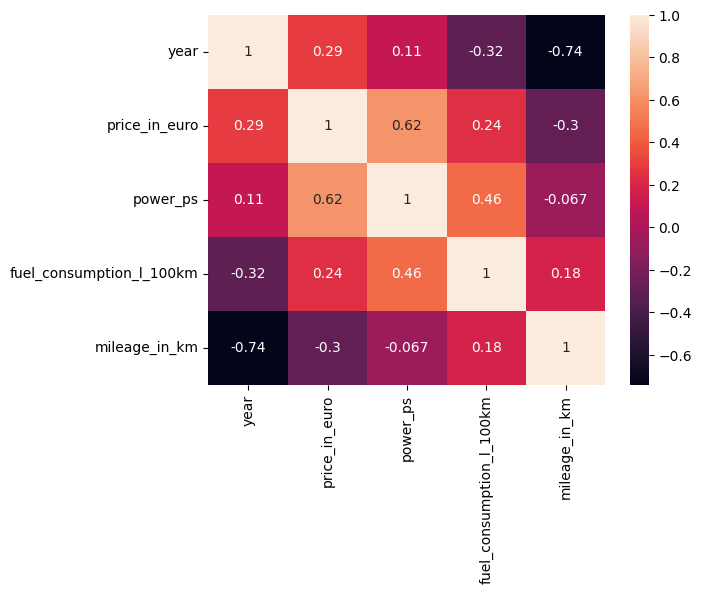

In [36]:
sns.heatmap(cars.select_dtypes(include=np.number).corr(), annot = True)

univariate analysis

brand distribution

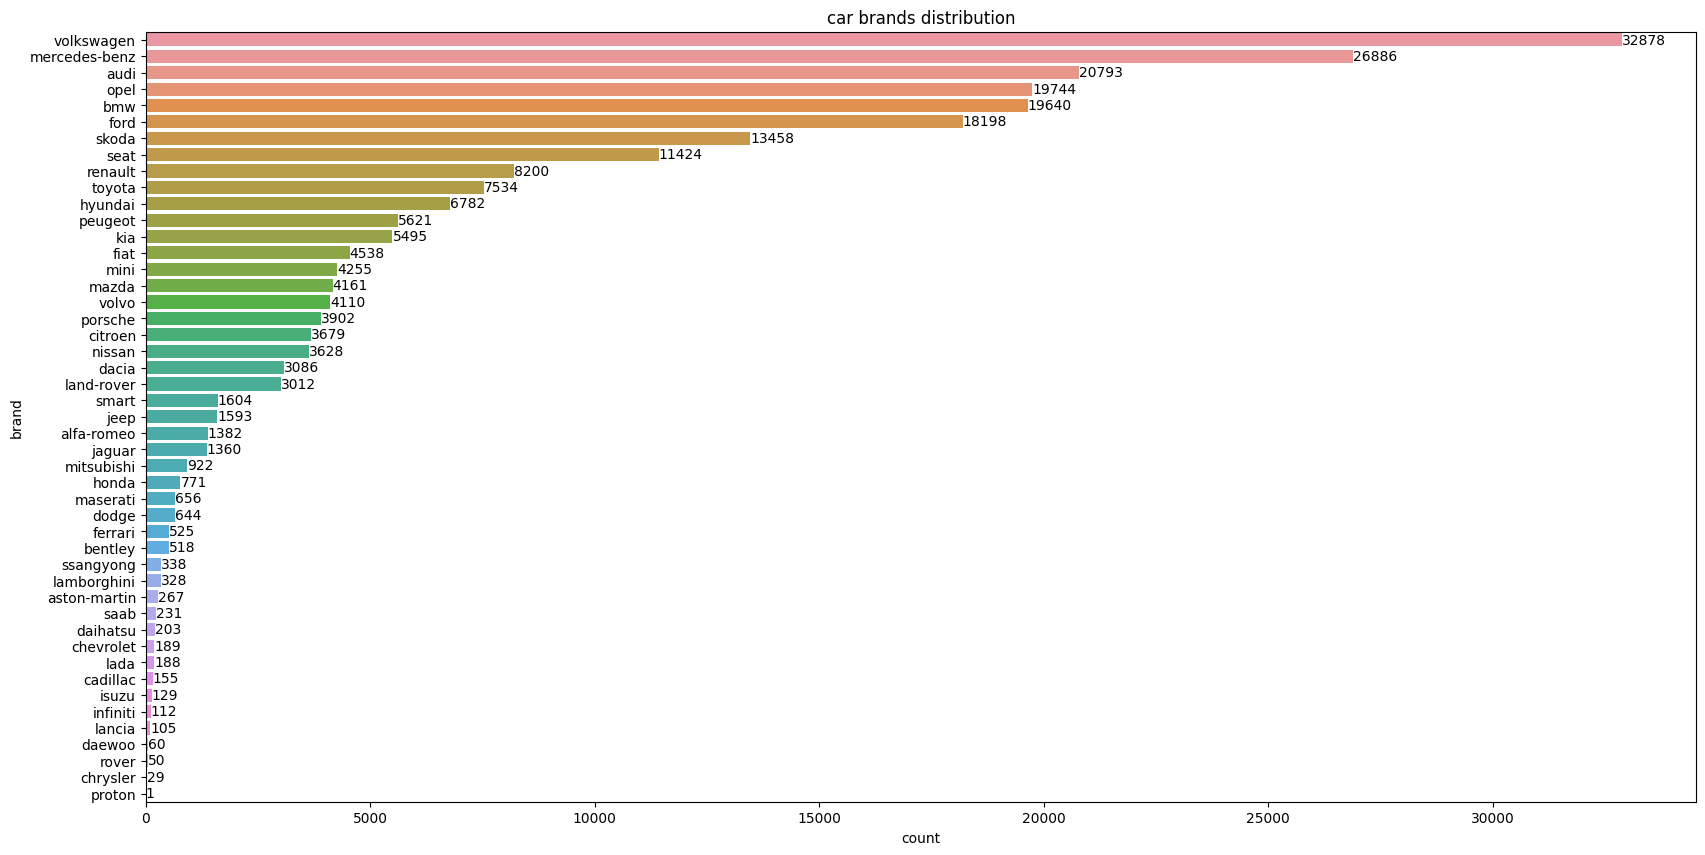

In [37]:
plt.figure(figsize=(20, 10))
plt.title('car brands distribution')
ax = sns.countplot(data = cars, y = 'brand', order=cars['brand'].value_counts().index)
ax.bar_label(ax.containers[0]);



color distribution

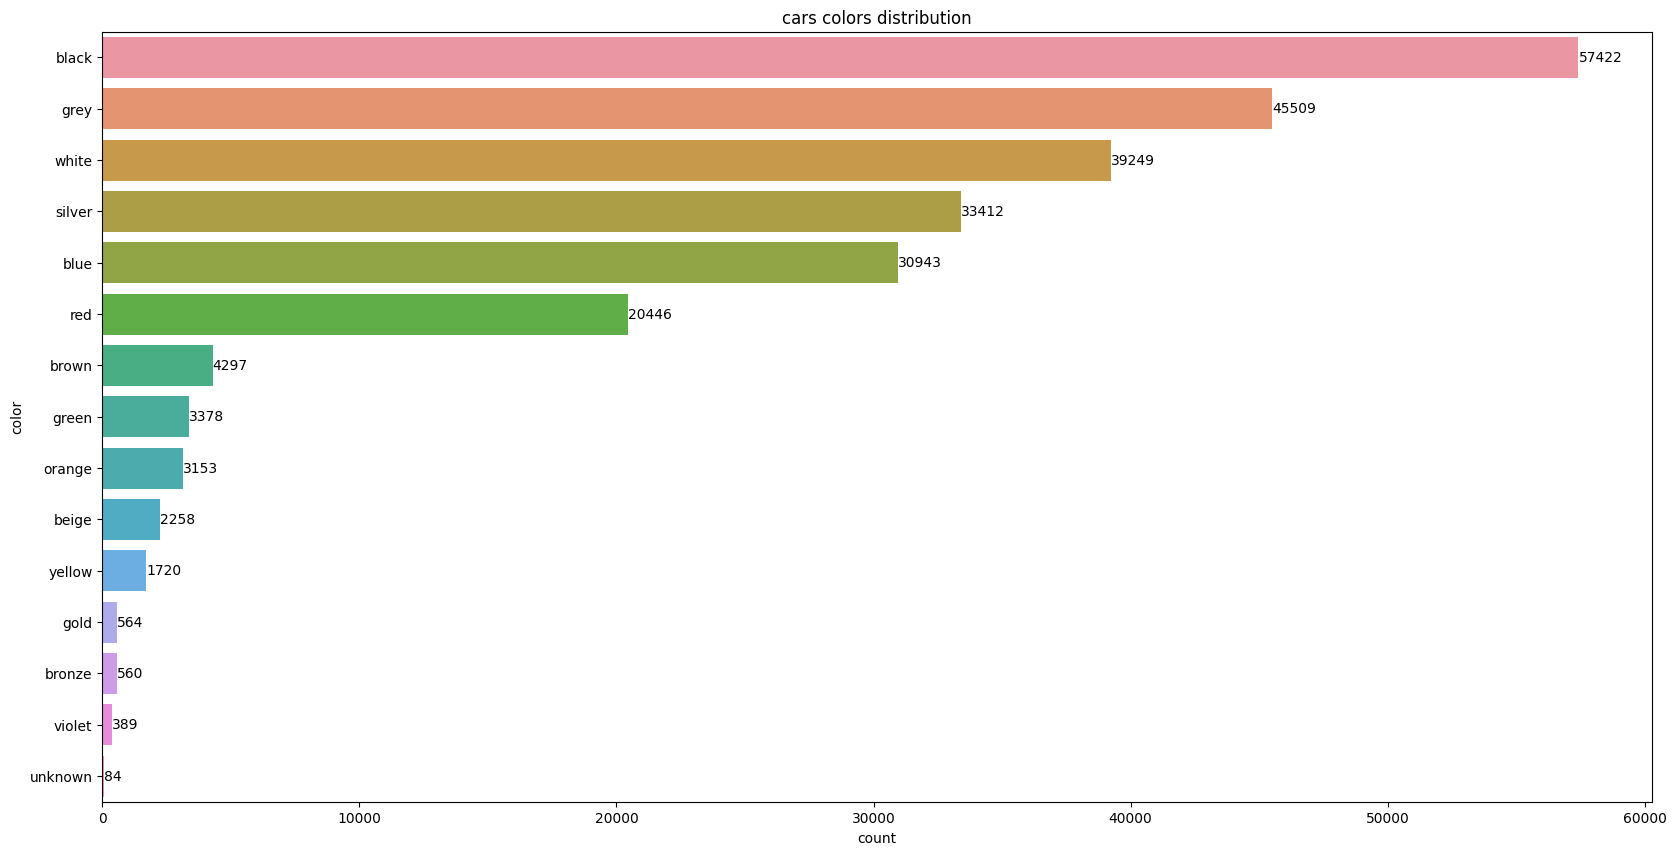

In [38]:
plt.figure(figsize=(20, 10))
plt.title('cars colors distribution')
ax = sns.countplot(data = cars, y = 'color', order=cars['color'].value_counts().index)
ax.bar_label(ax.containers[0]);



year distribution

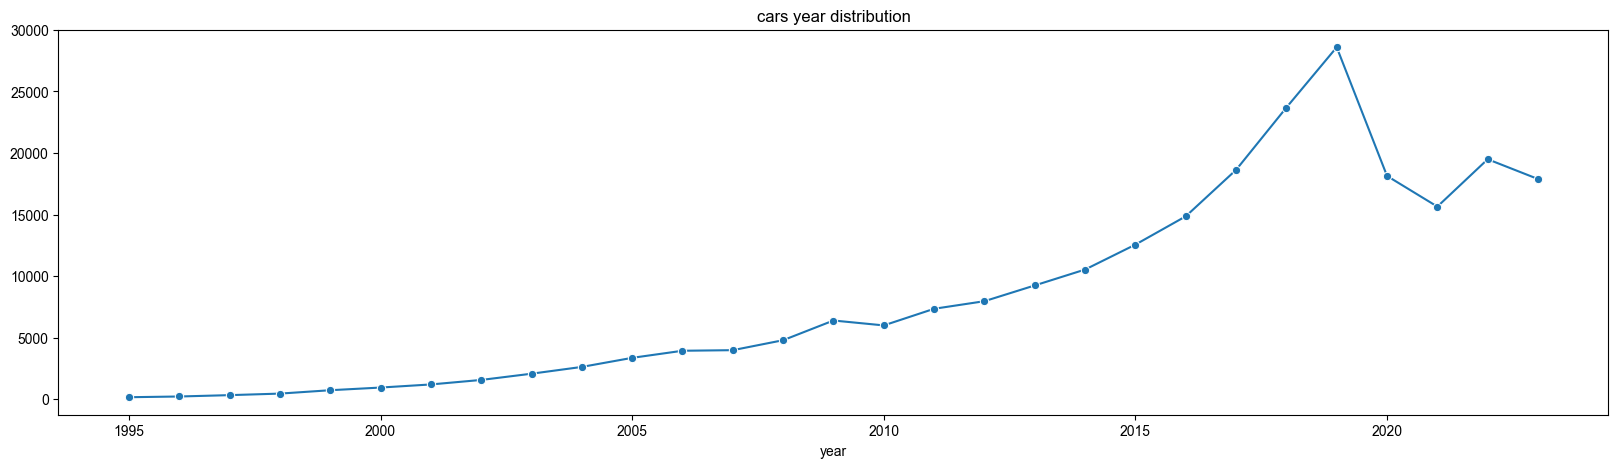

In [39]:
plt.figure(figsize=(20, 5))
plt.title('cars year distribution')
sns.lineplot(data= cars['year'], x=cars['year'].value_counts().index, y=cars['year'].value_counts().values, marker="o");
sns.set_style("darkgrid")

price distribution

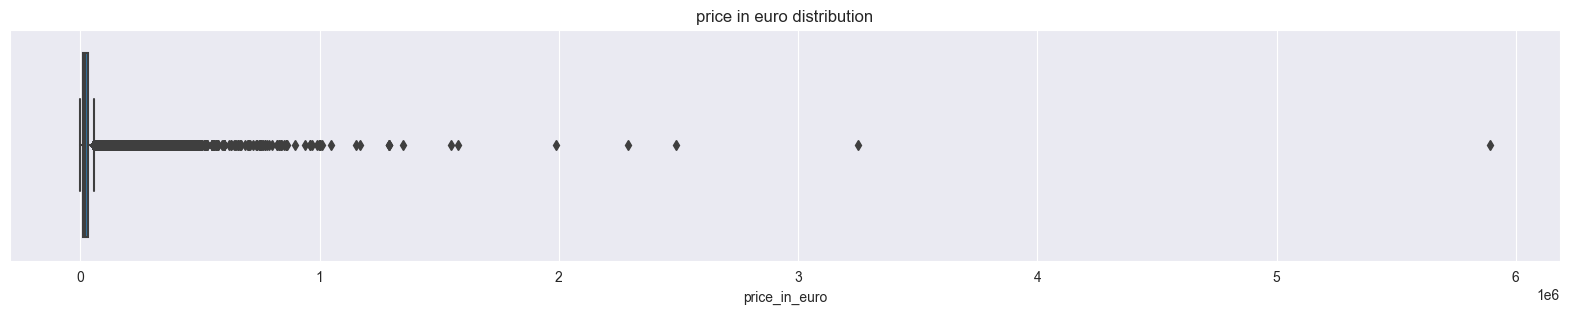

In [40]:
plt.figure(figsize=(20, 3))
plt.title('price in euro distribution')
sns.boxplot(data = cars, x = 'price_in_euro');



power_ps distribution 

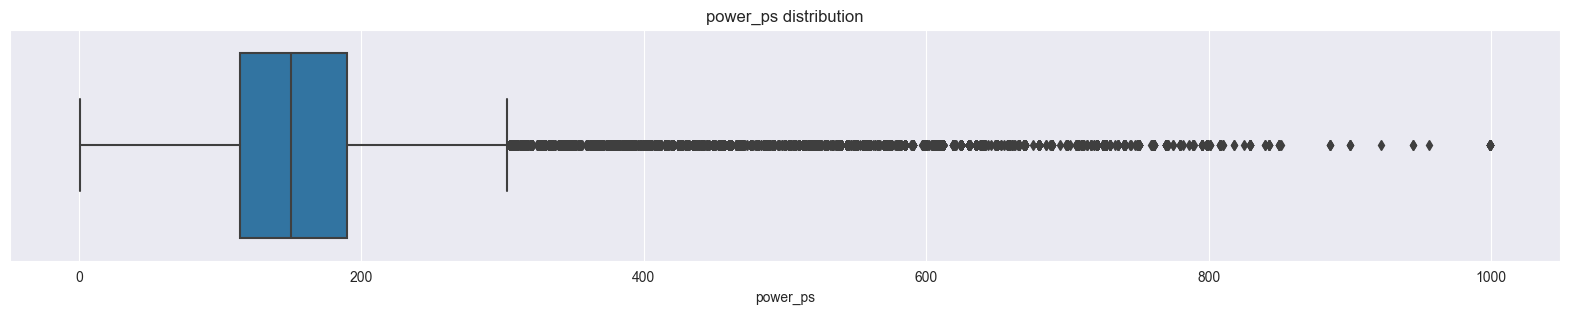

In [41]:
plt.figure(figsize=(20, 3))
plt.title('power_ps distribution')
sns.boxplot(data = cars, x = 'power_ps');


transmission distribution

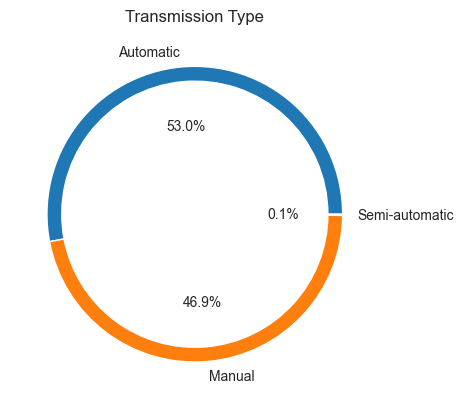

In [42]:
transmission_counts = cars['transmission_type'].value_counts()
plt.pie(transmission_counts, labels=transmission_counts.index, wedgeprops=dict(width=0.1), autopct='%1.1f%%')

plt.title('Transmission Type');


fuel type distribution

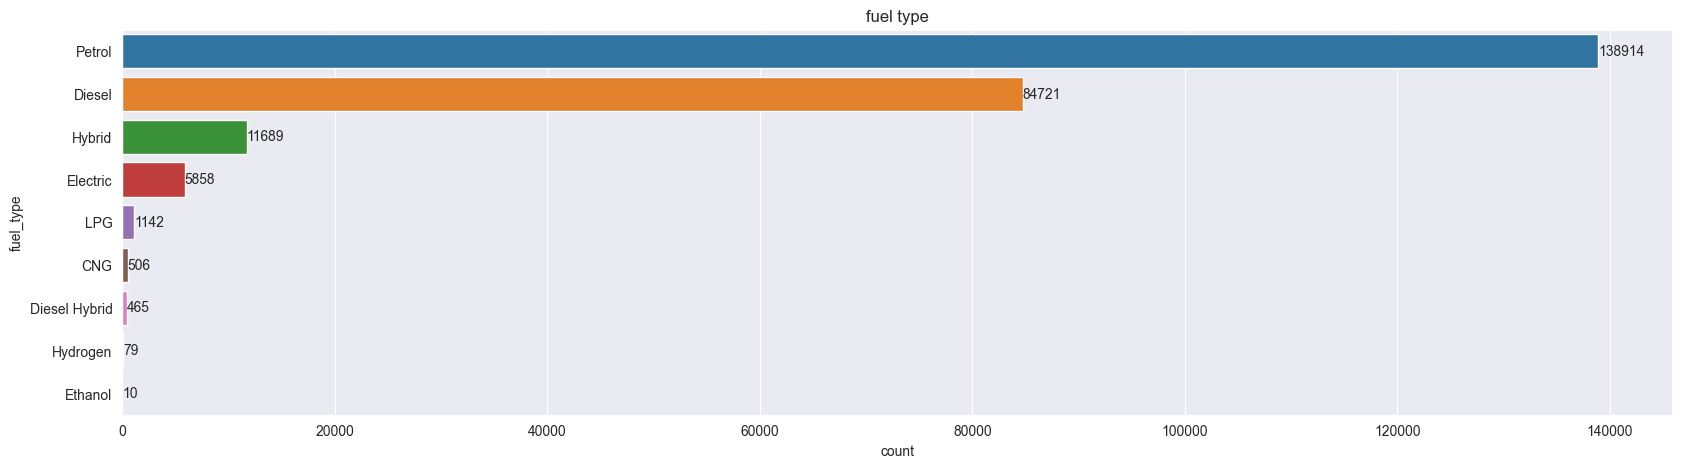

In [43]:
plt.figure(figsize=(20, 5))
plt.title('fuel type')
ax = sns.countplot(data = cars, y = 'fuel_type', order=cars['fuel_type'].value_counts().index)
ax.bar_label(ax.containers[0]);


fuel consumption distribution

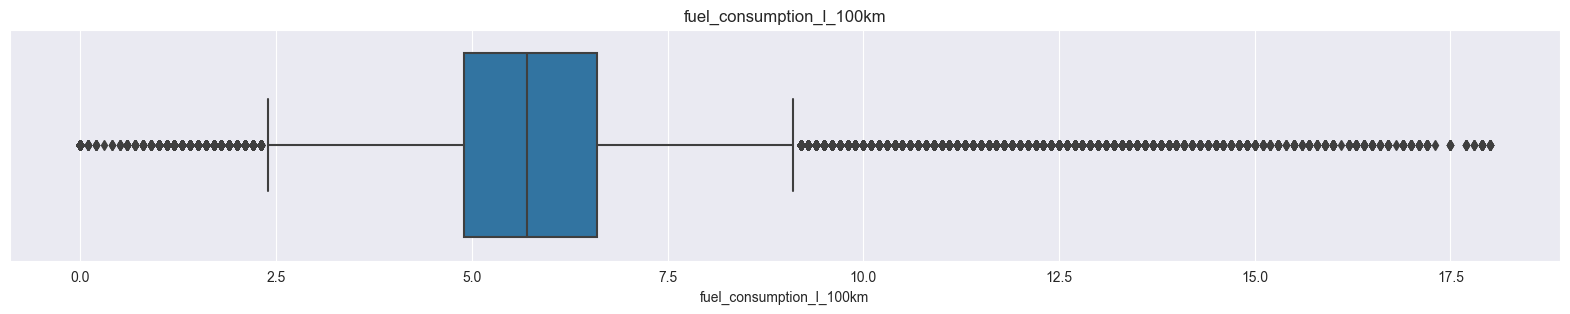

In [44]:
plt.figure(figsize=(20, 3))
plt.title('fuel_consumption_l_100km')
sns.boxplot(data = cars, x = 'fuel_consumption_l_100km');


mileage in km distribution

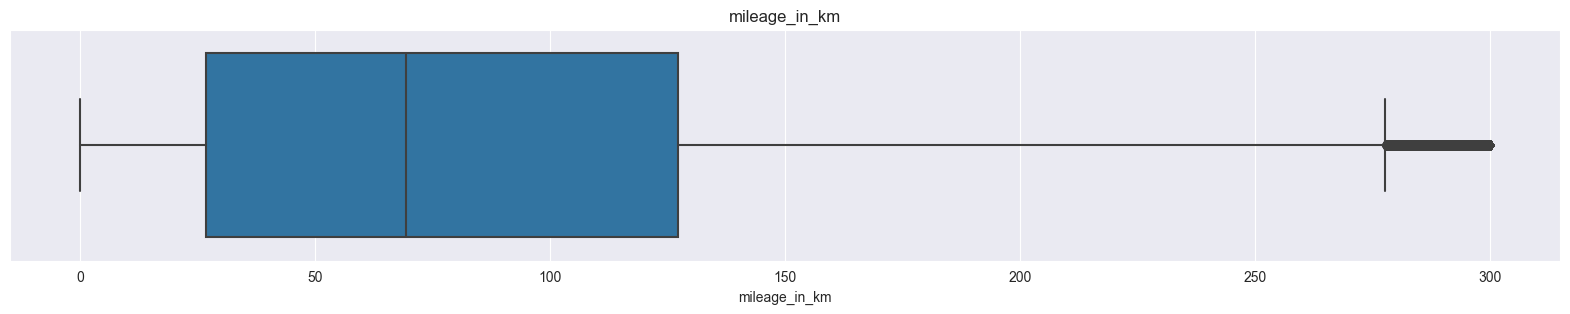

In [45]:
plt.figure(figsize=(20, 3))
plt.title('mileage_in_km')
sns.boxplot(data = cars, x = 'mileage_in_km');

#### Bivariate analysis

top 10 expensive car in term of transmission_type


In [46]:
transmission = cars.groupby(['transmission_type']).apply(lambda x: x.nlargest(10, 'price_in_euro')).reset_index(drop=True)


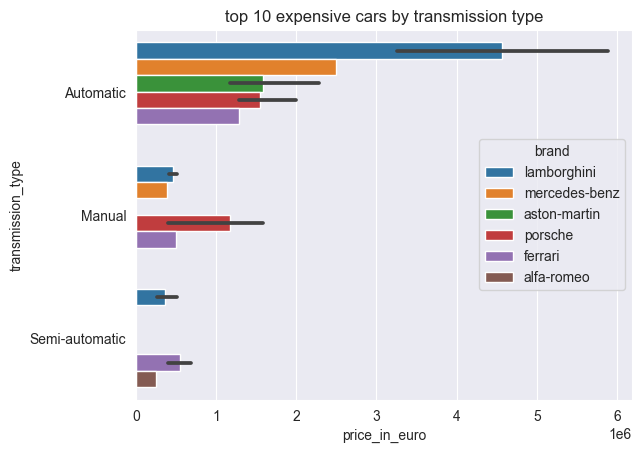

In [47]:
plt.title('top 10 expensive cars by transmission type')
sns.barplot(data = transmission, x = 'price_in_euro' , y= 'transmission_type',hue='brand');


what are the cars prices that takes the most Fuel Consumption


In [48]:
cars.sort_values(by='fuel_consumption_l_100km' ,ascending=False)

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
50375,dodge,Durango,grey,2020,52753.0,389,Automatic,Petrol,18.0,16.495
90735,lamborghini,Aventador,blue,2022,735000.0,780,Automatic,Petrol,18.0,0.302
90653,lamborghini,Aventador,green,2020,709900.0,770,Automatic,Petrol,18.0,0.292
153190,opel,Mokka,blue,2023,33980.0,136,Automatic,Electric,18.0,1.500
72541,ford,Mustang,violet,2022,57980.0,450,Automatic,Petrol,18.0,0.011
...,...,...,...,...,...,...,...,...,...,...
79130,hyundai,KONA,grey,2020,24900.0,136,Automatic,Electric,0.0,13.000
79131,hyundai,KONA,grey,2020,30490.0,204,Automatic,Electric,0.0,30.203
158146,peugeot,208,blue,2021,26990.0,136,Automatic,Electric,0.0,19.385
79145,hyundai,KONA,grey,2020,24900.0,136,Automatic,Electric,0.0,62.576


In [49]:
cars.loc[cars['fuel_type']=='Electric', 'fuel_consumption_l_100km'] = \
cars.loc[cars['fuel_type']=='Electric', 'fuel_consumption_l_100km'].apply(lambda x: 0 if x > 0 else x)

In [50]:
cons_price =cars.groupby(['brand','price_in_euro'])[['fuel_consumption_l_100km']].value_counts().reset_index().sort_values(by='fuel_consumption_l_100km').tail(10)
cons_price


,brand,price_in_euro,fuel_consumption_l_100km,count
40482,dodge,69800.0,18.0,1
71548,lamborghini,735000.0,18.0,1
71546,lamborghini,709900.0,18.0,1
40364,dodge,52753.0,18.0,1
1327,aston-martin,63500.0,18.0,1
40238,dodge,39900.0,18.0,1
57423,ford,57980.0,18.0,1
71559,lamborghini,837760.0,18.0,1
40510,dodge,76950.0,18.0,1
71544,lamborghini,699000.0,18.0,1


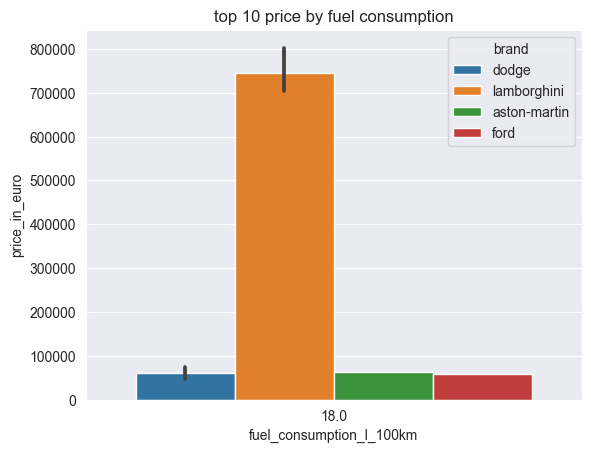

In [51]:
plt.title('top 10 price by fuel consumption')
sns.barplot(data = cons_price, x = 'fuel_consumption_l_100km' , y= 'price_in_euro' ,hue='brand' );

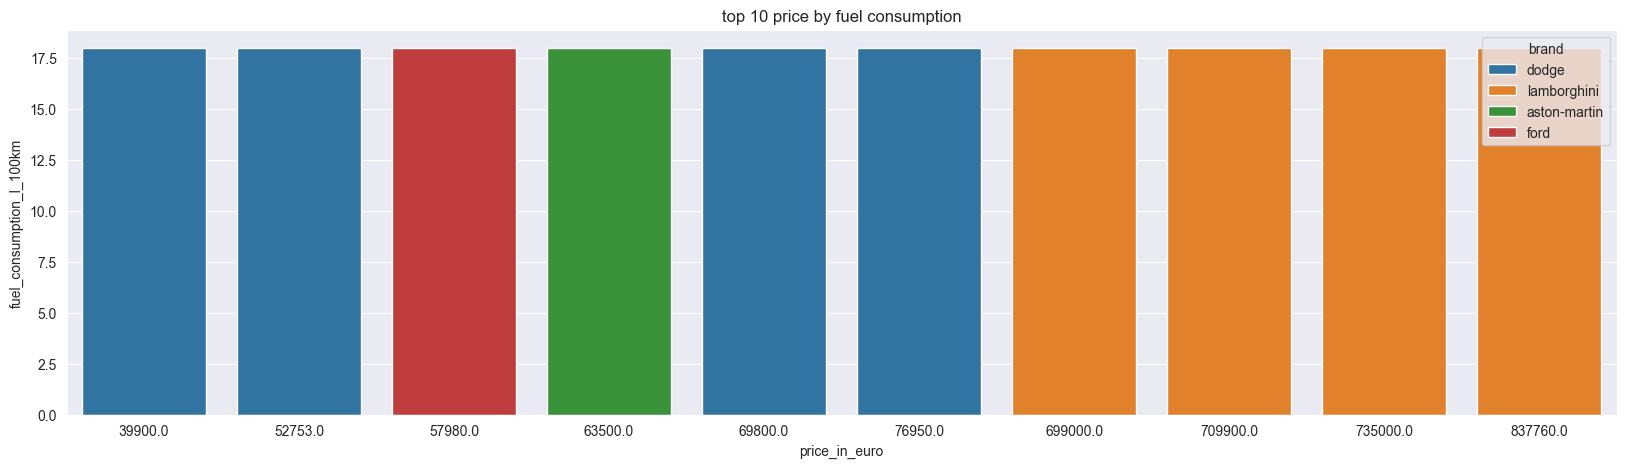

In [52]:
plt.figure(figsize=(20, 5))
plt.title('top 10 price by fuel consumption')
sns.barplot(data = cons_price, x ='price_in_euro'  , y= 'fuel_consumption_l_100km' ,hue='brand', dodge=False);
 

what are the prices by year of made


In [53]:
pr_year = cars.groupby(['year'])[['price_in_euro']].sum().reset_index()



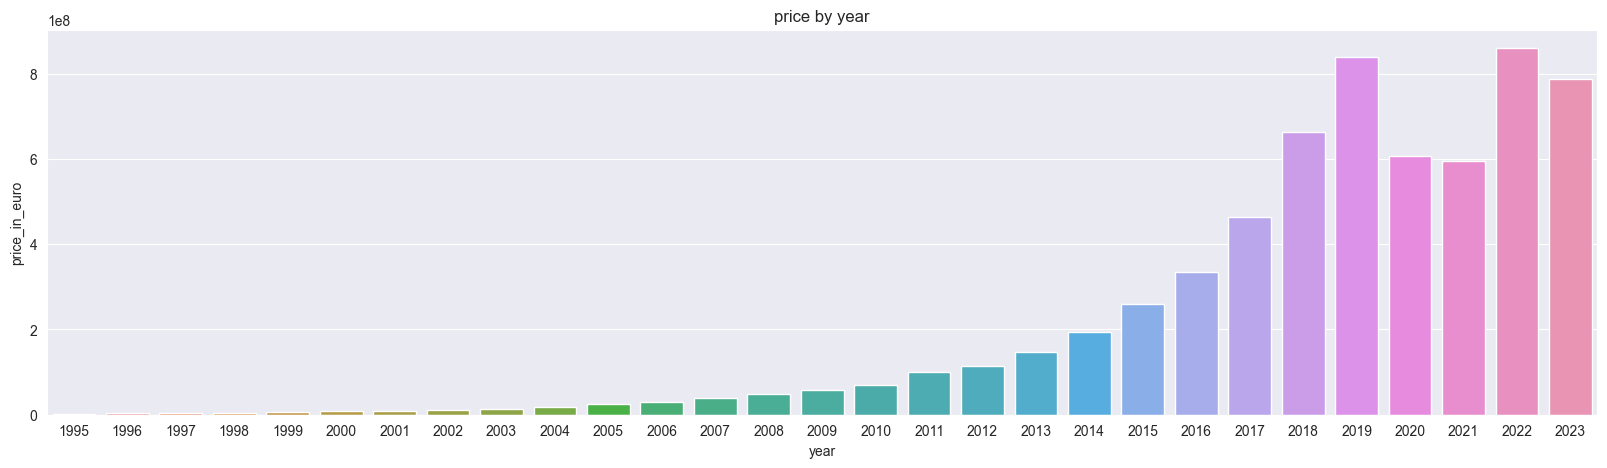

In [54]:
plt.figure(figsize=(20, 5))
plt.title('price by year')
sns.barplot(data = pr_year, y ='price_in_euro'  , x= 'year' );
 

what are the prices by Milage in km


In [55]:
#define function to catagories car status per mileages in km
def car_status (x):
    if x <= 5:
        return 'Excellent'
    if x > 5 and x <= 50:
        return 'Fine'
    if x > 50 and x <=100:
        return 'Very good'
    if x > 100 and x <= 130:
        return 'good'
    if x > 130 and x <=180:
        return 'Restorable'
    else: 
        return 'Export'
cars['car_status'] = cars['mileage_in_km'].apply(car_status)
    

In [56]:
pr_mileage = cars.groupby(['car_status'])[['price_in_euro']].sum().reset_index().head()



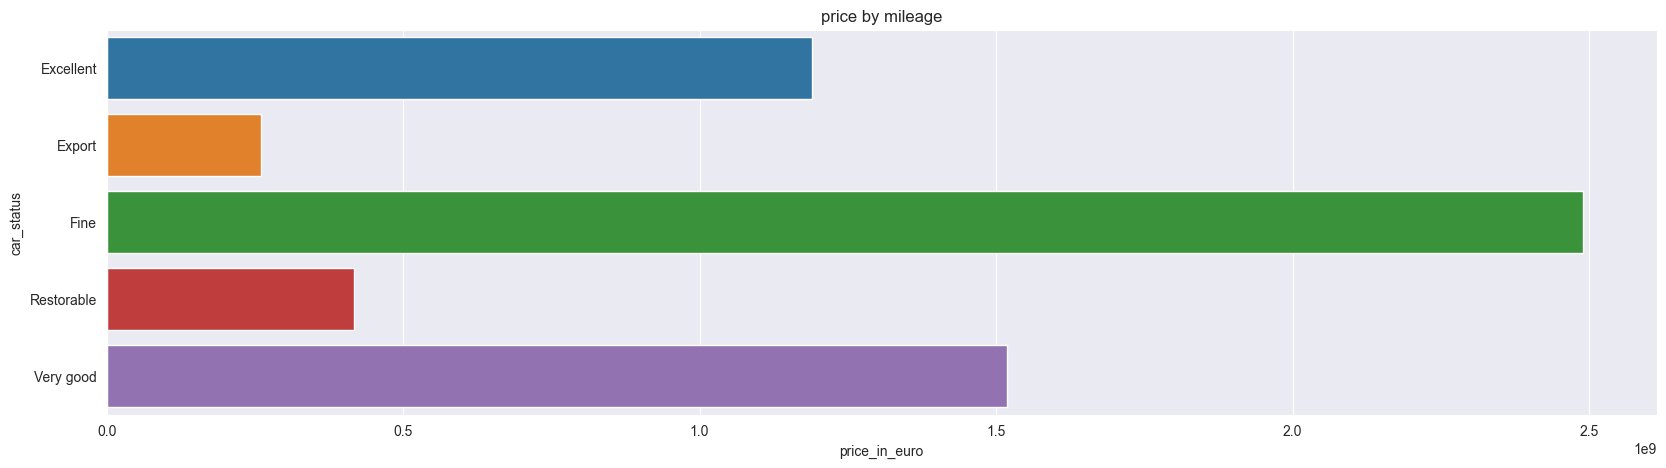

In [57]:
plt.figure(figsize=(20, 5))
plt.title('price by mileage')
sns.barplot(data = pr_mileage, x ='price_in_euro'  , y= 'car_status' );
 

what are the prices by fuel type

In [58]:
pr_fuel = cars.groupby(['fuel_type'])[['price_in_euro']].sum().reset_index().head()


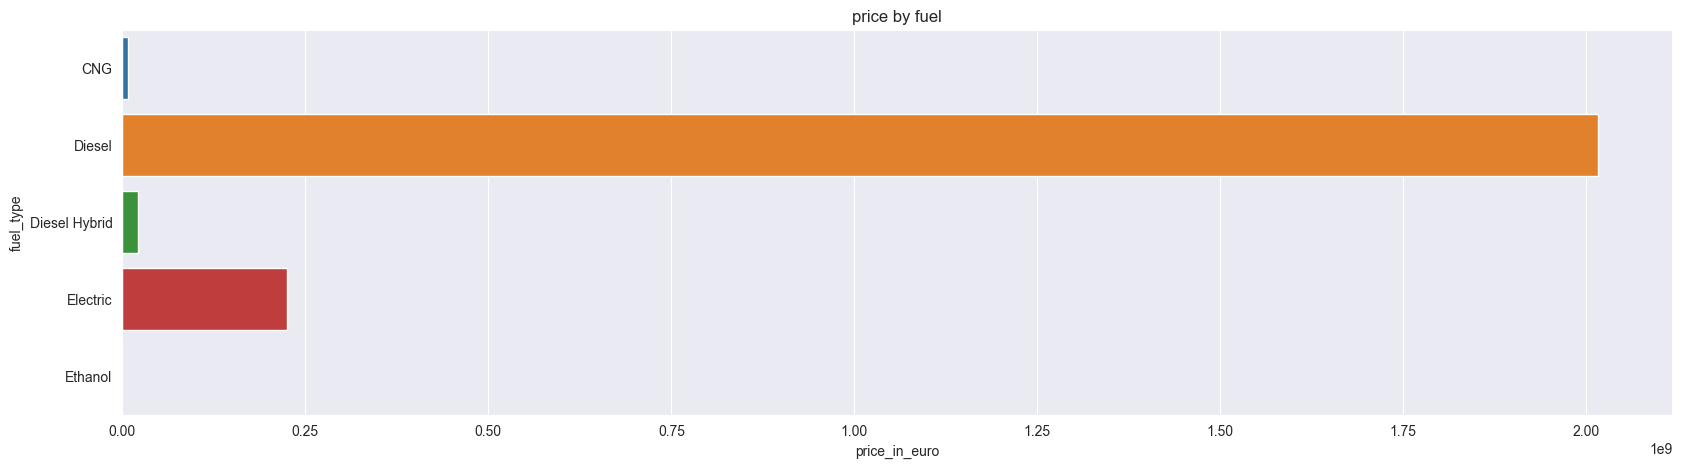

In [59]:
plt.figure(figsize=(20, 5))
plt.title('price by fuel')
sns.barplot(data = pr_fuel, x ='price_in_euro'  , y= 'fuel_type' );

most expensive car in each brand

In [60]:
pr_brand = cars.groupby('brand').apply(lambda x: x.nlargest(1, 'price_in_euro')).reset_index(drop=True).sort_values(by='price_in_euro')

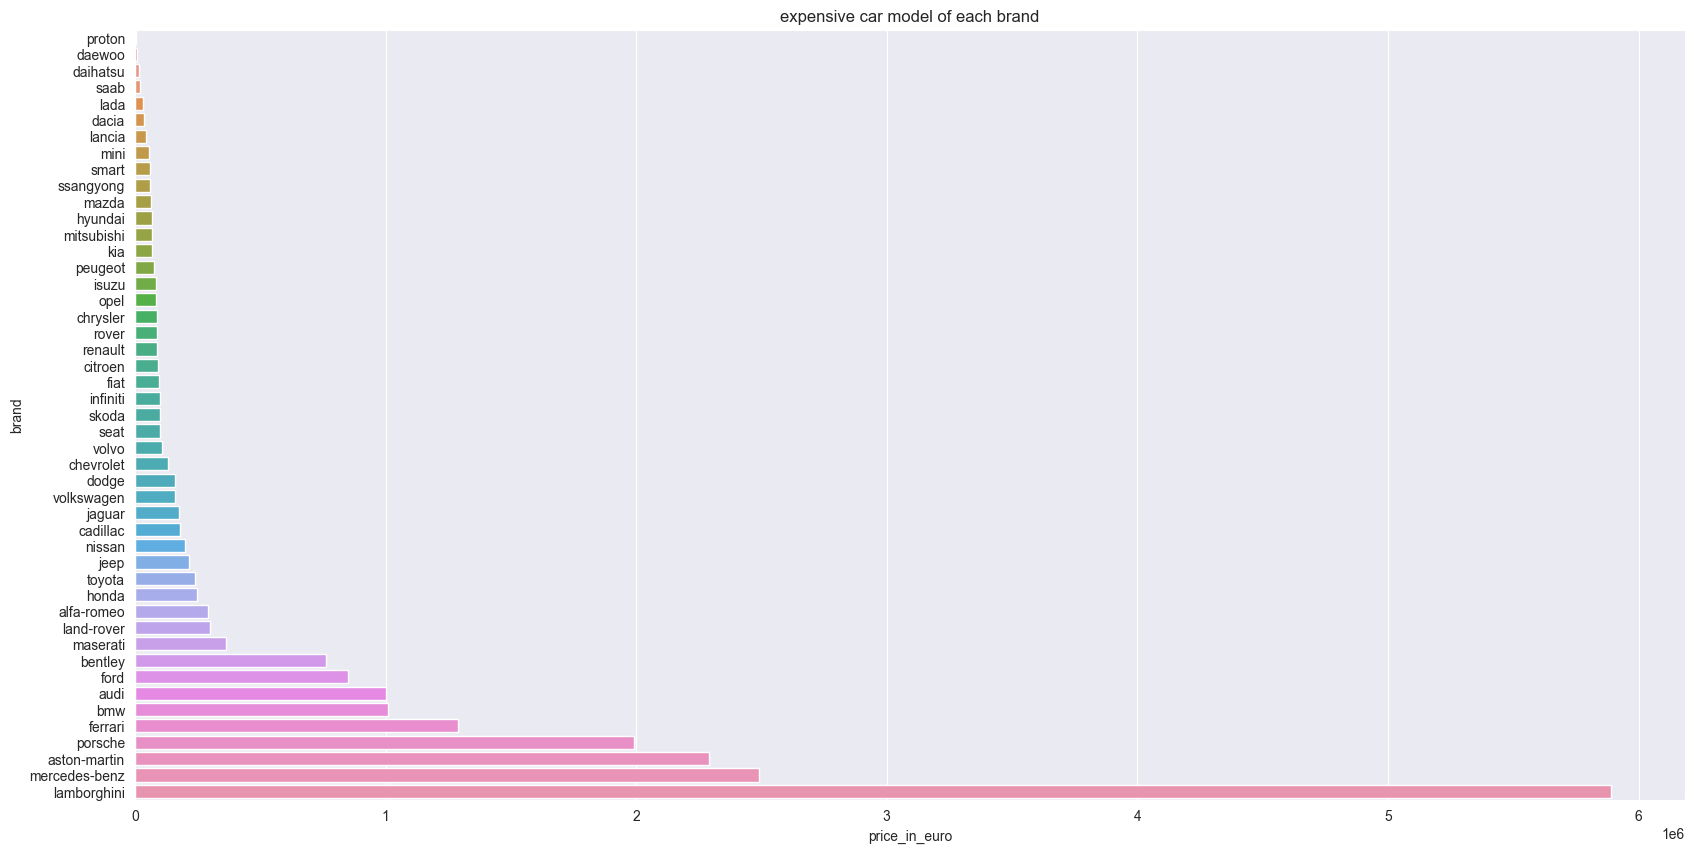

In [61]:
plt.figure(figsize=(20, 10))
plt.title('expensive car model of each brand')
sns.barplot(data = pr_brand, x ='price_in_euro'  , y= 'brand' );

how many car of each brand are for sale 

In [62]:
num_brand = cars.groupby(['brand'])[['brand']].value_counts().sort_values().reset_index()


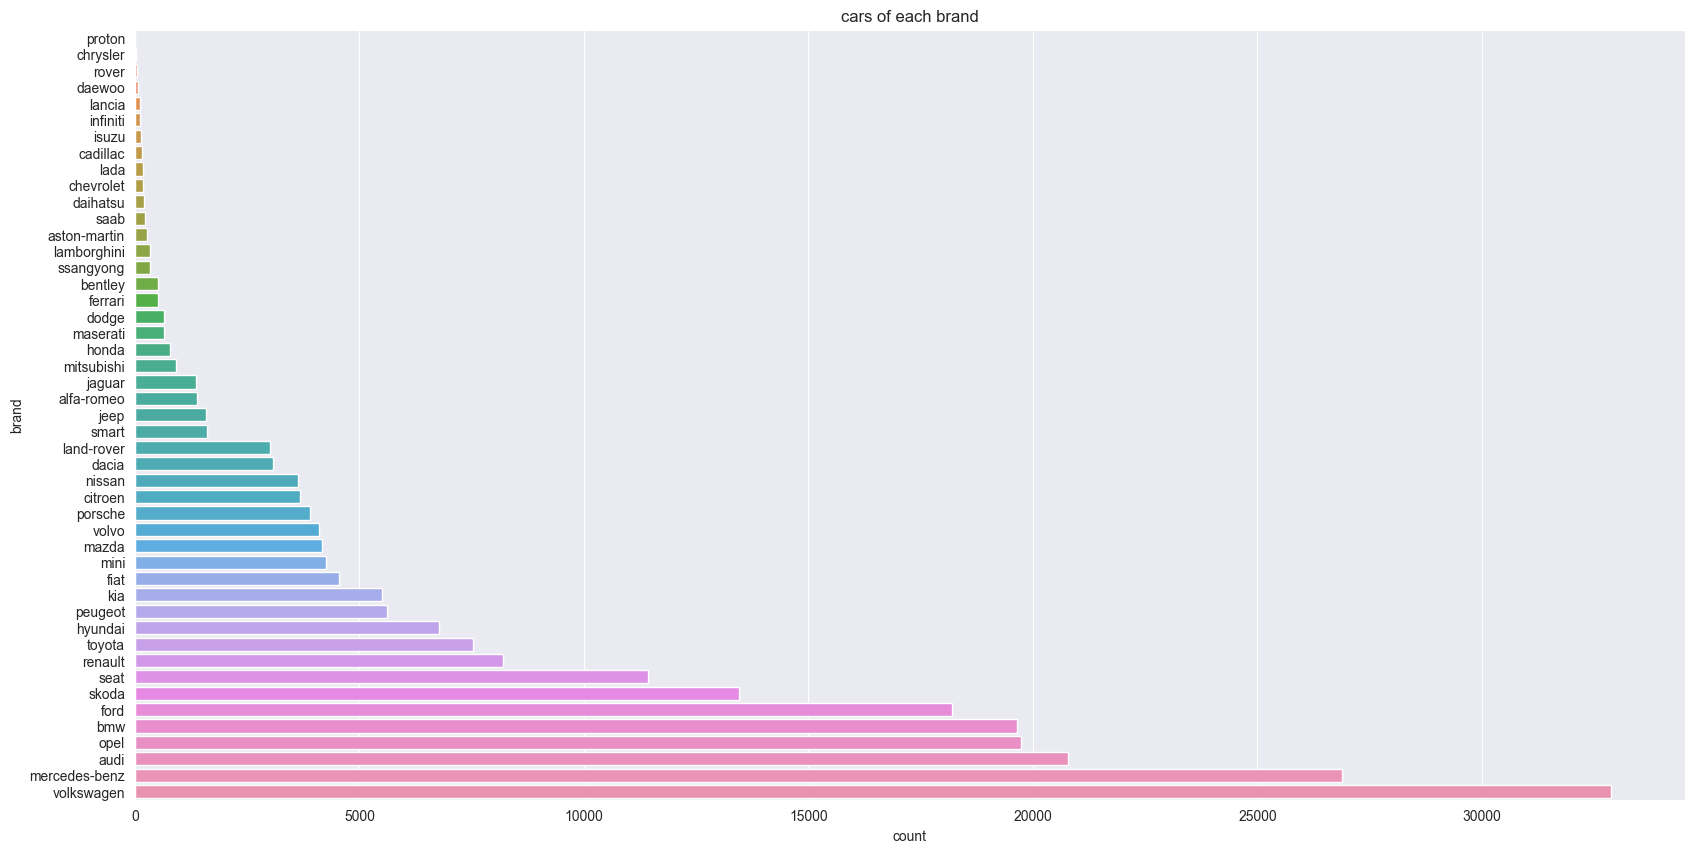

In [63]:
plt.figure(figsize=(20, 10))
plt.title('cars of each brand')
sns.barplot(data = num_brand, x ='count'  , y= 'brand' );


 year make is for sale

In [64]:
year_count = cars['year'].value_counts().reset_index()

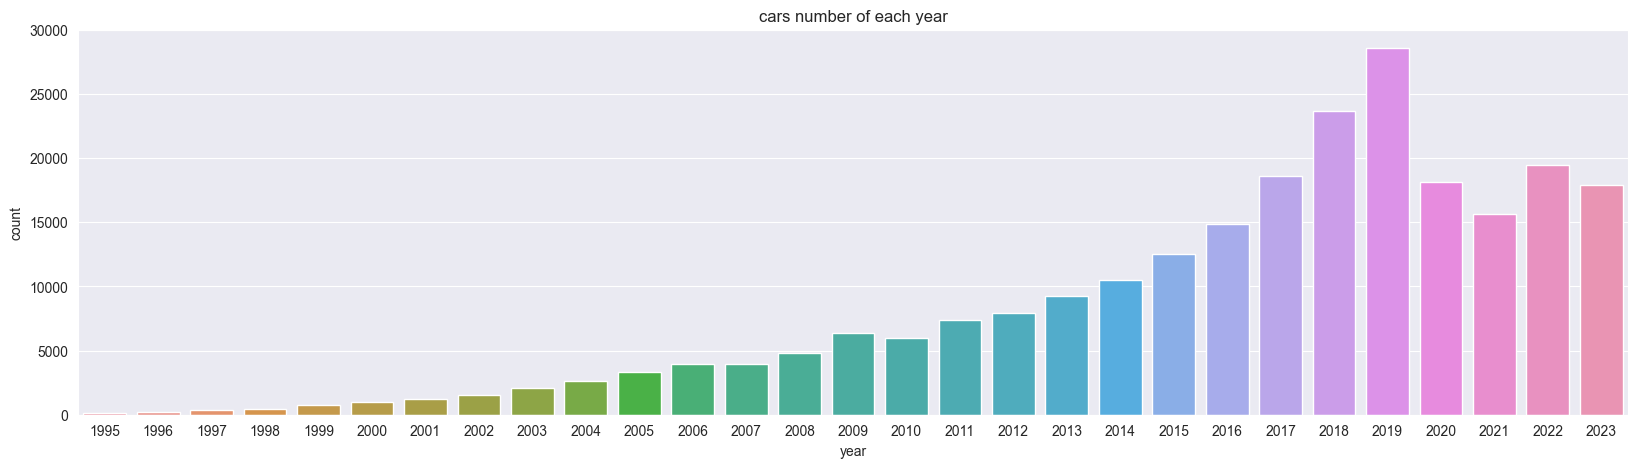

In [65]:
plt.figure(figsize=(20, 5))
plt.title('cars number of each year')
sns.barplot(data = year_count, x ='year'  , y= 'count' );


top powerful cars

In [66]:
power = cars.groupby(['brand','model'])[['power_ps']].max().sort_values(by='power_ps', ascending=False).reset_index().head(10)


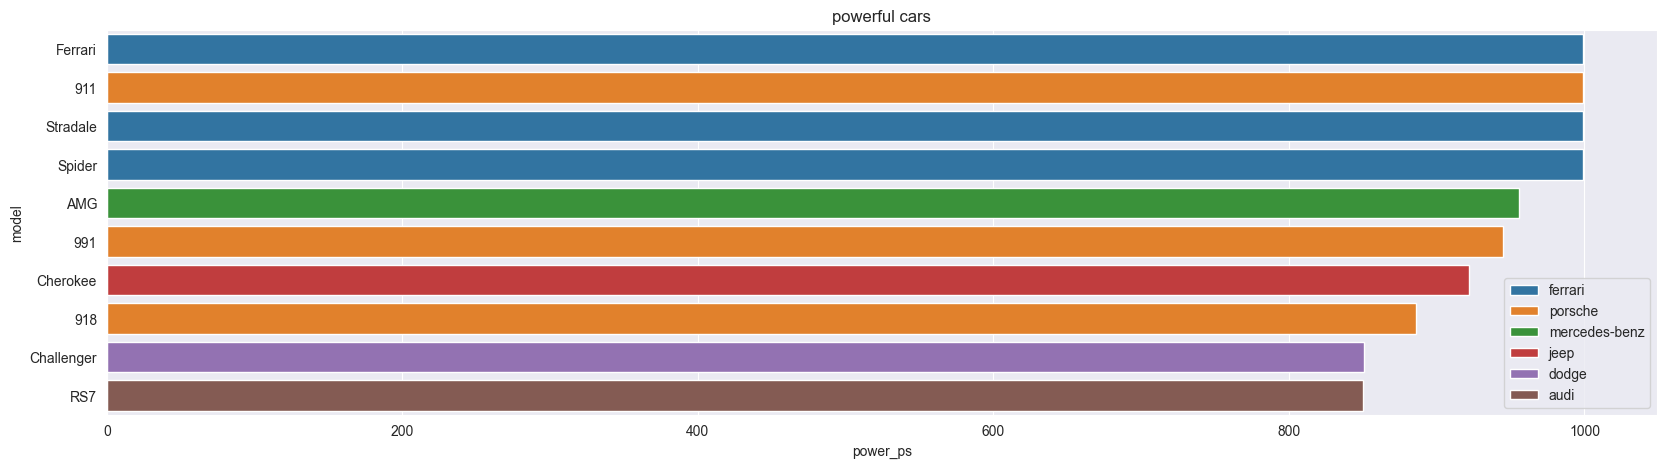

In [67]:
plt.figure(figsize=(20, 5))
plt.title('powerful cars')
sns.barplot(data = power, x ='power_ps'  , y= 'model' , hue= 'brand',dodge=False )
plt.legend(loc='lower right');

how many cars by fuel type per year

In [68]:
f_count = cars.groupby(['year'])[['fuel_type']].value_counts().reset_index()


<Axes: title={'center': 'fuel type per year'}, xlabel='year', ylabel='count'>

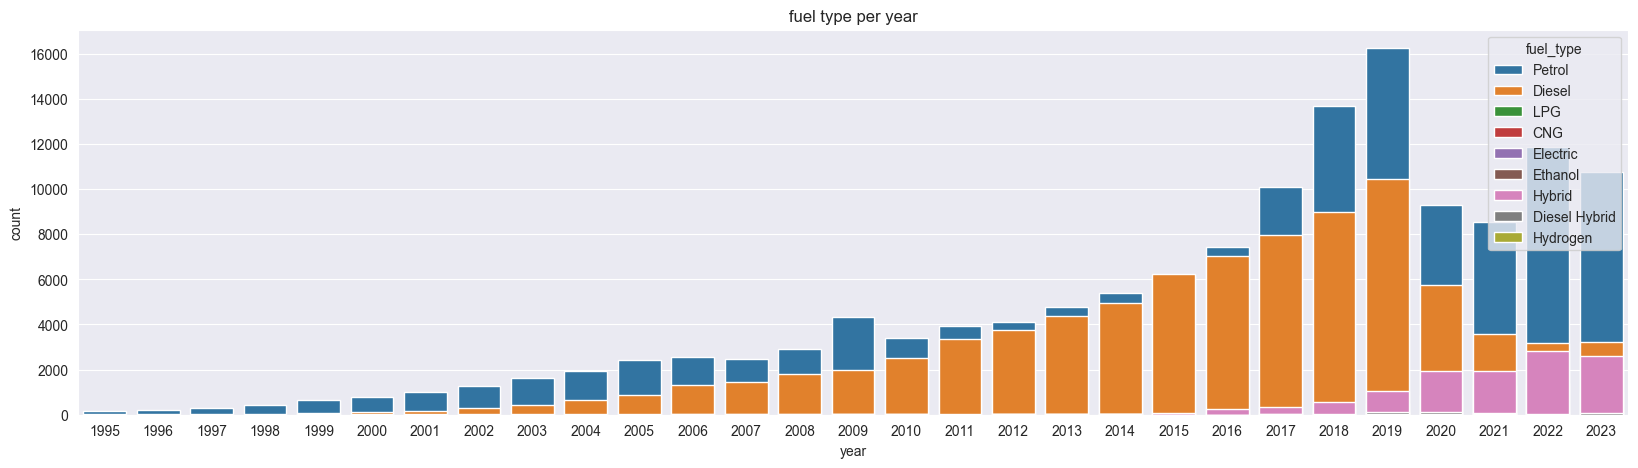

In [69]:
plt.figure(figsize =(20,5))
plt.title('fuel type per year')
sns.barplot(data=f_count, x= 'year', y='count', hue= 'fuel_type',dodge= False)

fuel consumption by transmission type

In [70]:
tr_fuel = cars.groupby(['transmission_type'])[['fuel_consumption_l_100km']].sum().reset_index()


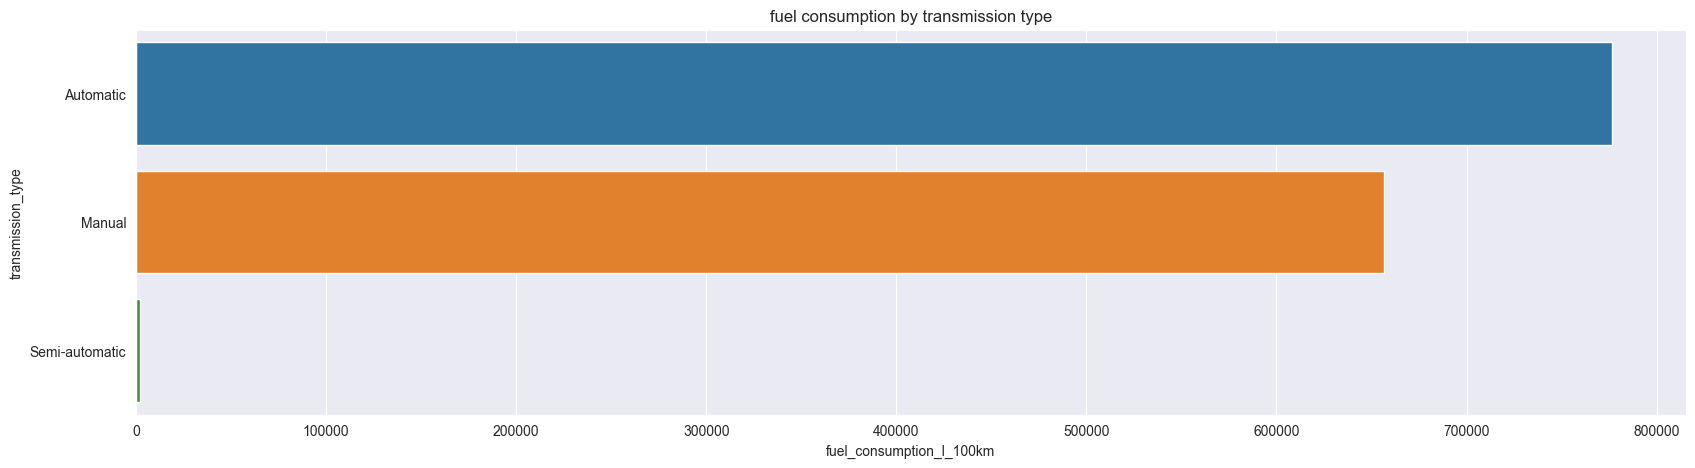

In [71]:
plt.figure(figsize =(20,5))
plt.title('fuel consumption by transmission type')
sns.barplot(data = tr_fuel, x= 'fuel_consumption_l_100km', y='transmission_type');

fel consumption by fuel type

In [72]:
cons_fuel = cars.groupby(['fuel_type'])[['fuel_consumption_l_100km']].sum().reset_index()


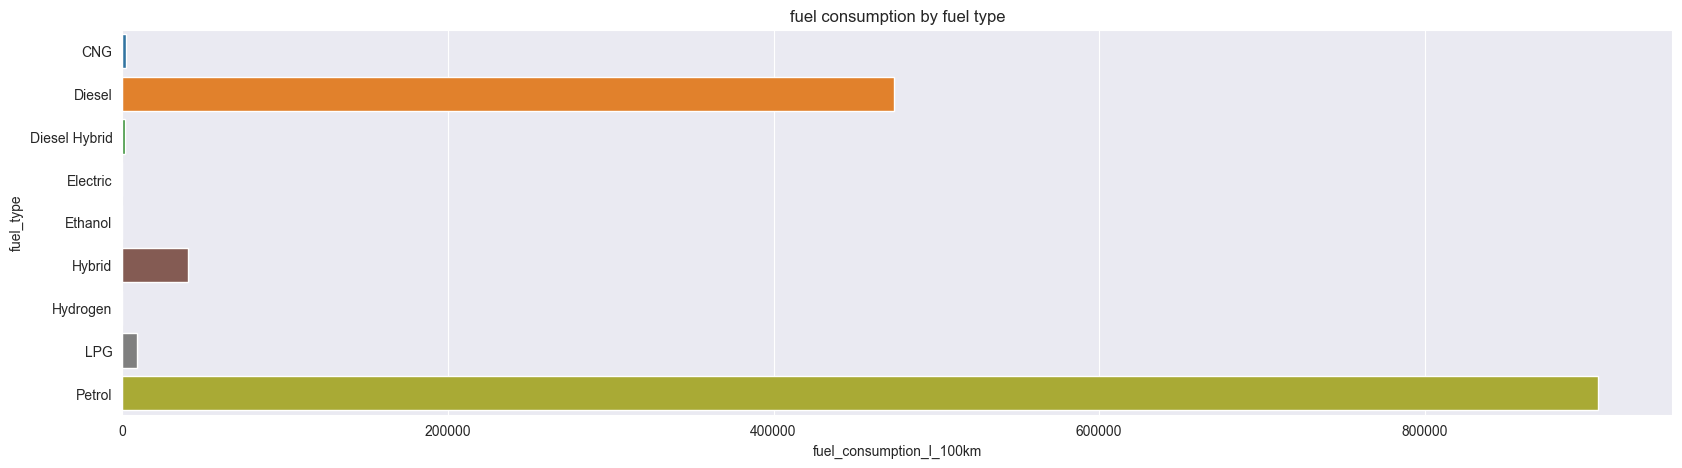

In [73]:
plt.figure(figsize =(20,5))
plt.title('fuel consumption by fuel type')
sns.barplot(data = cons_fuel, x= 'fuel_consumption_l_100km', y='fuel_type');

transmission by fuel

In [74]:
tr_f_type = cars.groupby(['transmission_type'])[['fuel_type']].value_counts().reset_index()

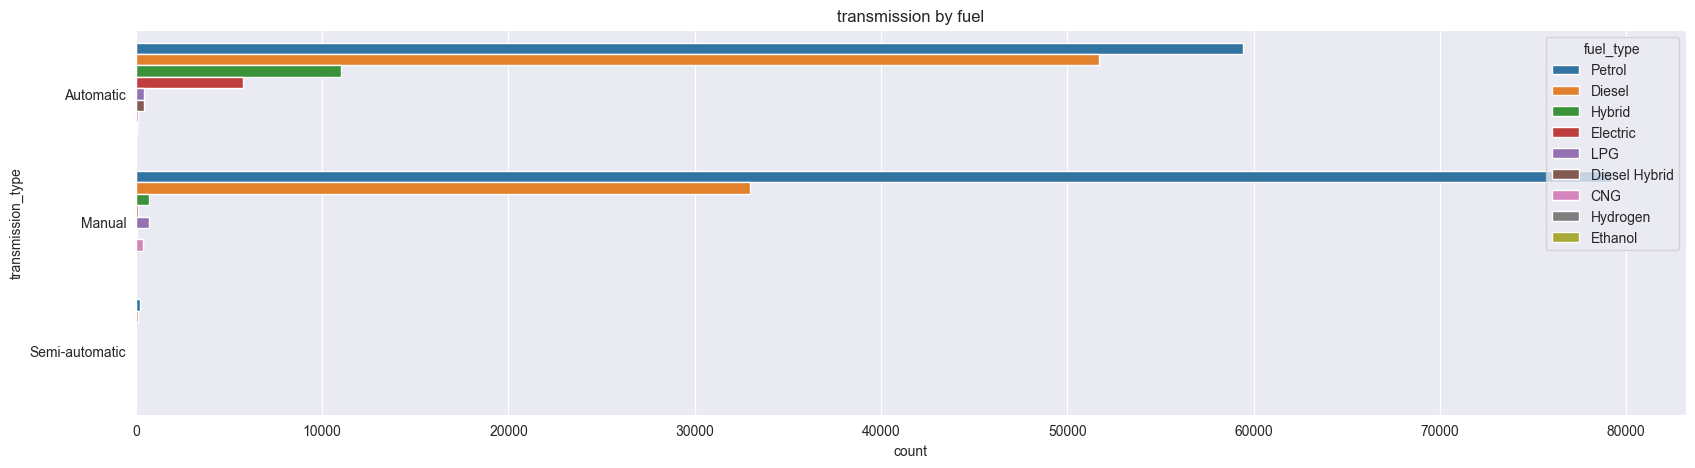

In [75]:
plt.figure(figsize =(20,5))
plt.title('transmission by fuel')
sns.barplot(data = tr_f_type, x= 'count', y='transmission_type', hue= 'fuel_type');

price per transmission 

In [76]:
price_per_transmission = cars.groupby(['transmission_type'])[['price_in_euro']].sum().reset_index()
price_per_transmission

,transmission_type,price_in_euro
0,Automatic,4.598815e+09
1,Manual,1.703683e+09
2,Semi-automatic,1.082545e+07


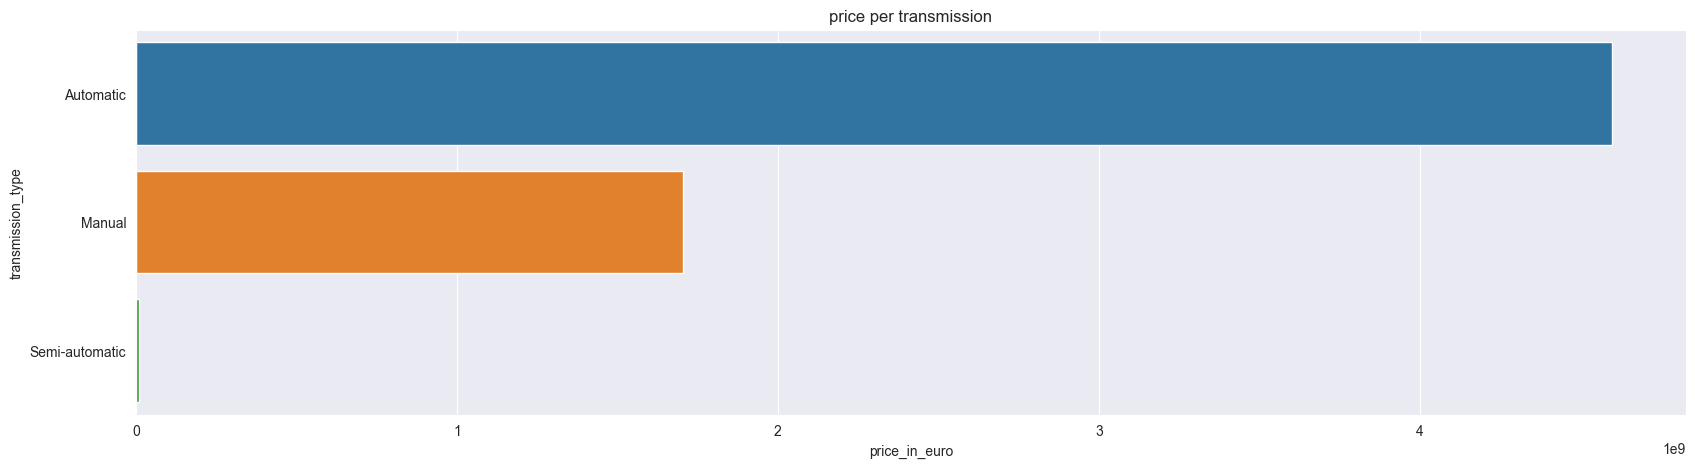

In [77]:
plt.figure(figsize =(20,5))
plt.title('price per transmission')
sns.barplot(data = price_per_transmission, x= 'price_in_euro', y='transmission_type');

cars status per brand

In [78]:
stats_brand = cars.groupby(['car_status'])[['brand']].value_counts().reset_index()


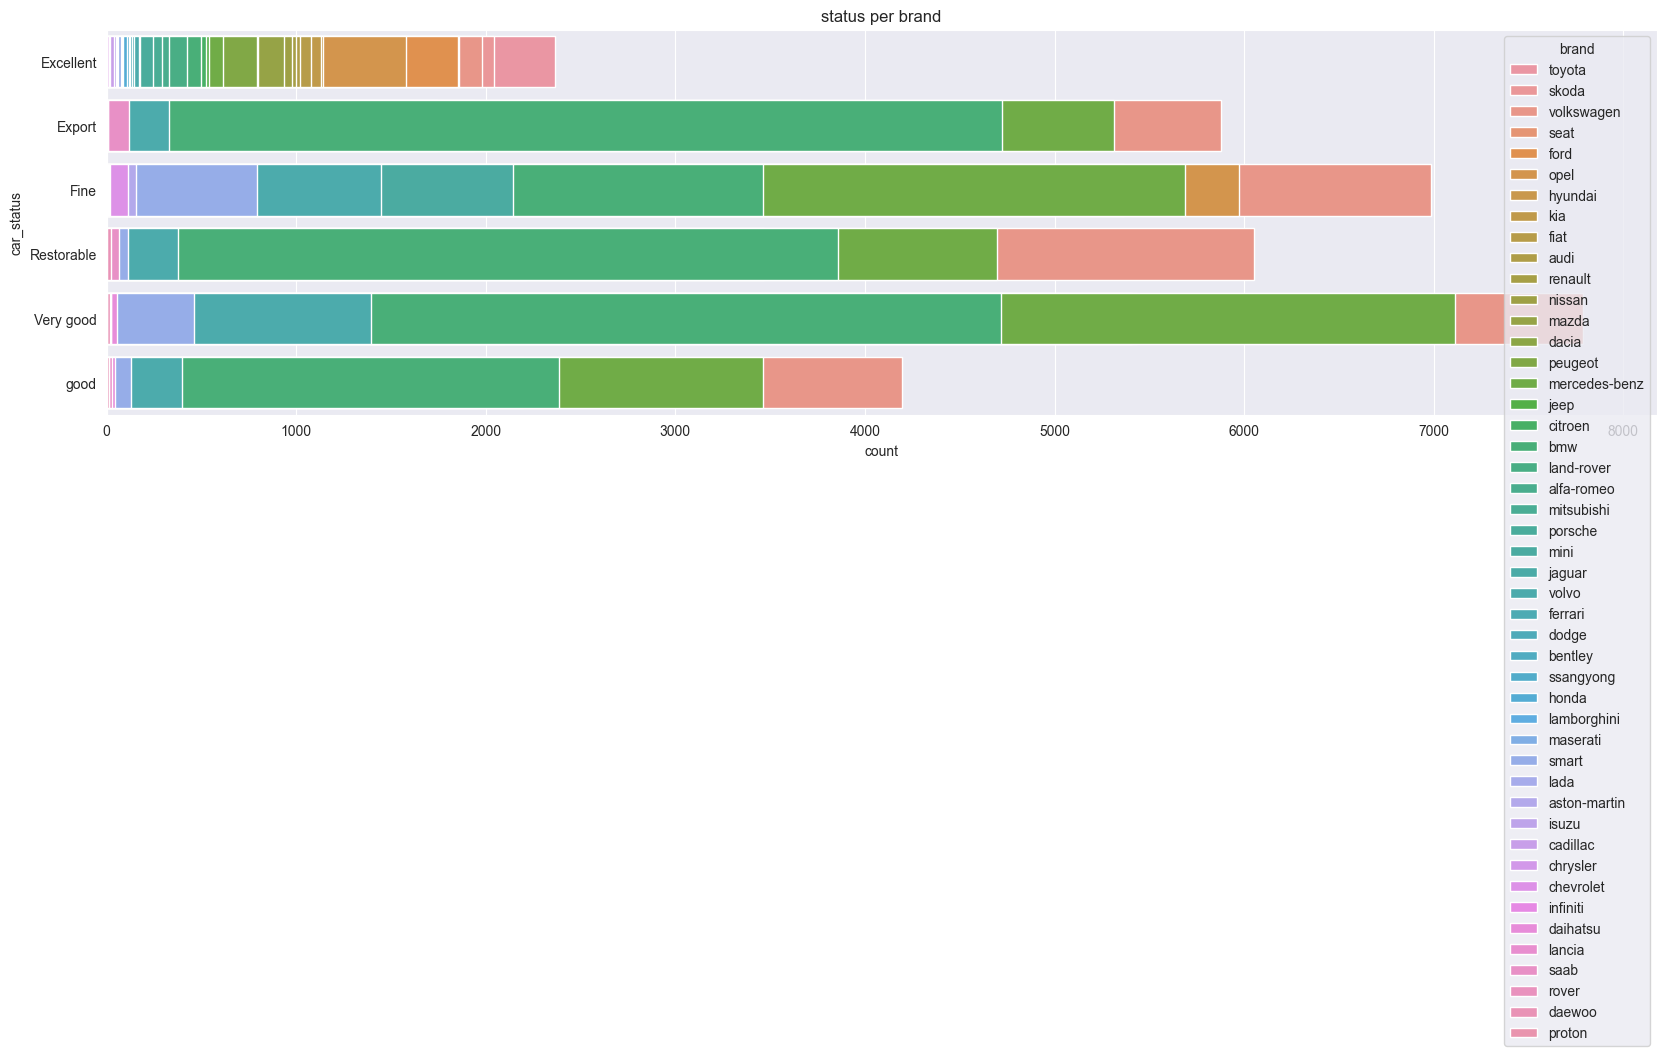

In [79]:
plt.figure(figsize =(20,5))
plt.title('status per brand')
sns.barplot(data = stats_brand, x= 'count', y='car_status', hue= 'brand' , dodge= False);

mileage in km by year

In [80]:
mil_year = cars.groupby(['year'])[['mileage_in_km']].sum().reset_index()


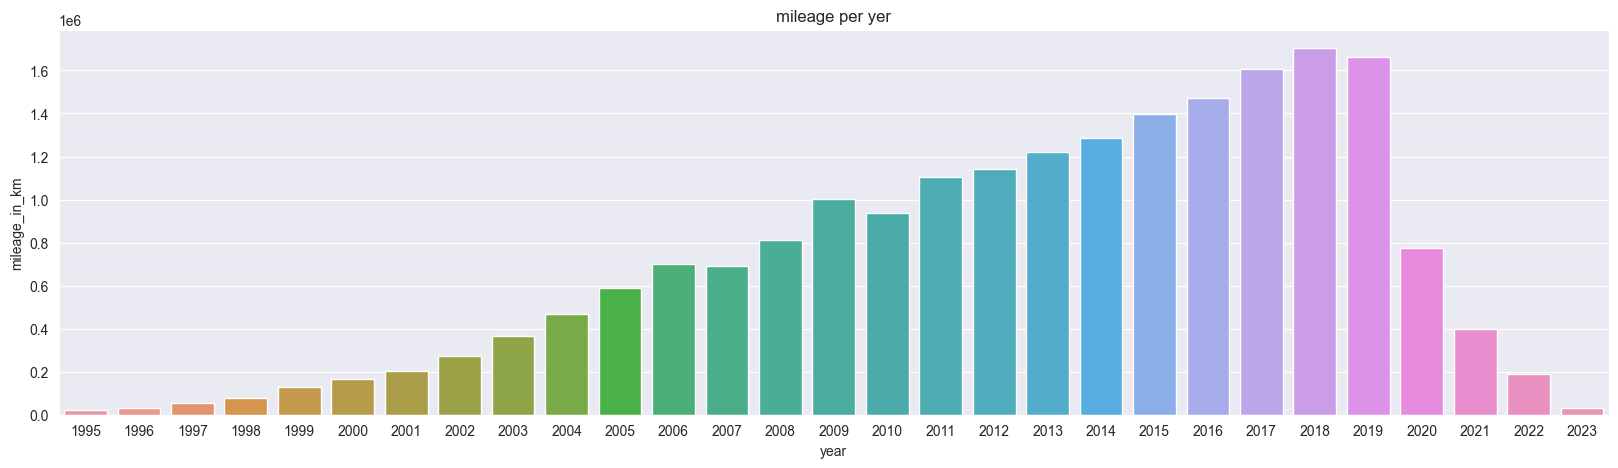

In [81]:
plt.figure(figsize =(20,5))
plt.title('mileage per yer')
sns.barplot(data = mil_year, x= 'year', y='mileage_in_km');

average fuel consumption per model 

In [82]:
av_fuel = cars.groupby(['brand'])['fuel_consumption_l_100km'].mean().reset_index()


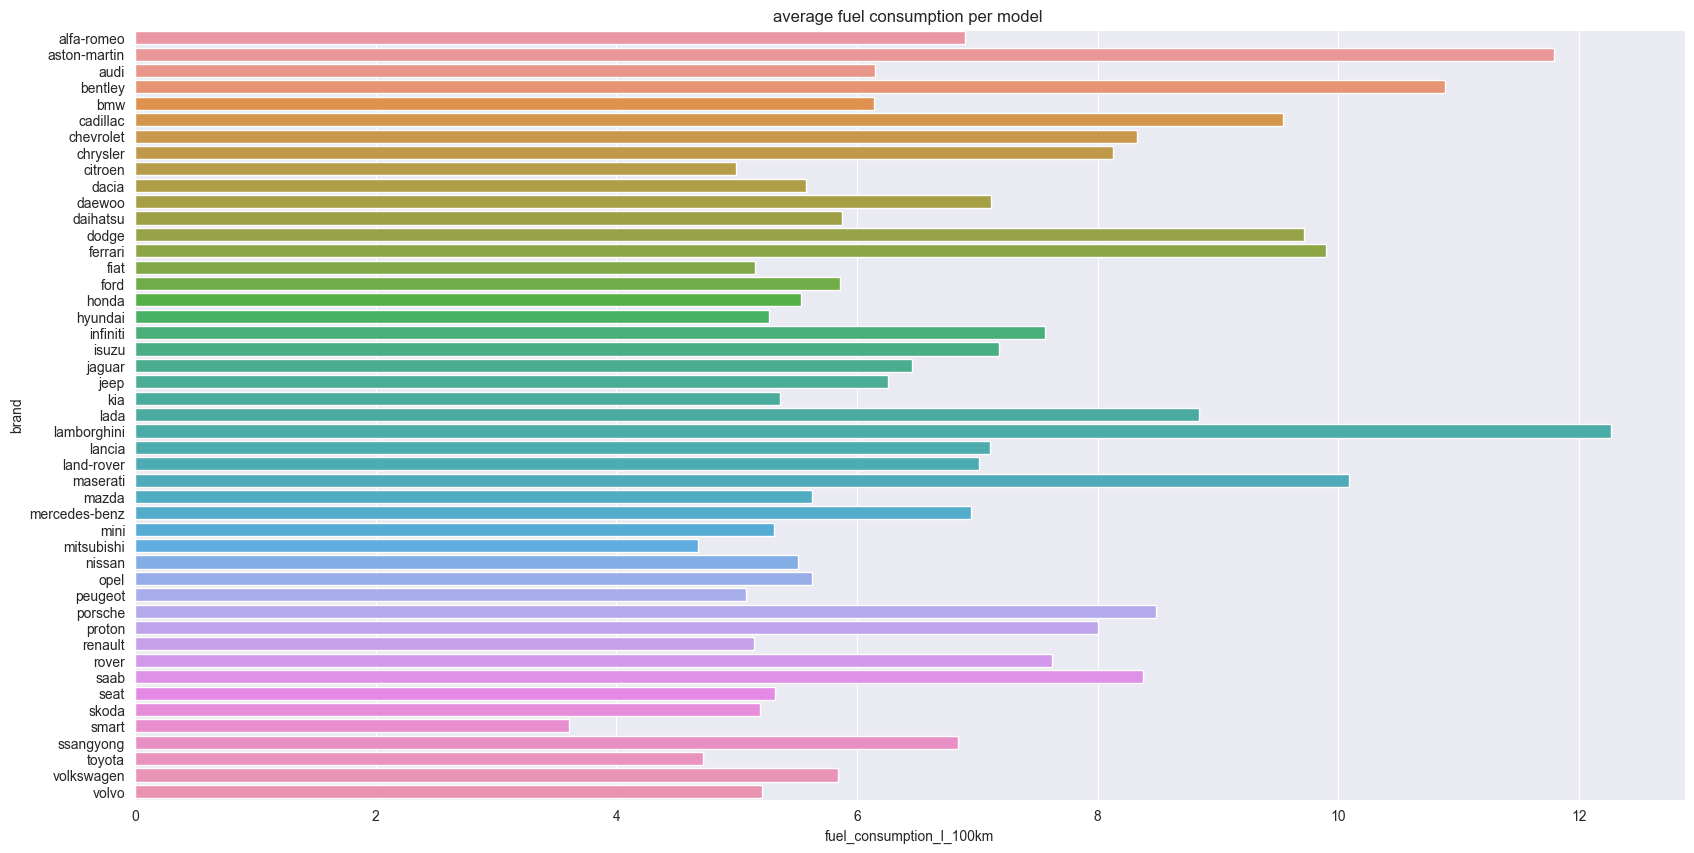

In [83]:
plt.figure(figsize =(20,10))
plt.title('average fuel consumption per model ')
sns.barplot(data =av_fuel, x= 'fuel_consumption_l_100km', y='brand');

In [84]:
cars.head()

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km,car_status
0,alfa-romeo,GTV,red,1995,1300.0,201,Manual,Petrol,10.9,160.500,Restorable
1,alfa-romeo,164,black,1995,24900.0,260,Manual,Petrol,6.6,190.000,Export
2,alfa-romeo,Spider,black,1995,5900.0,150,Automatic,Petrol,6.6,129.000,good
3,alfa-romeo,Spider,black,1995,4900.0,150,Manual,Petrol,9.5,189.500,Export
4,alfa-romeo,164,red,1996,17950.0,179,Manual,Petrol,7.2,96.127,Very good


In [85]:
cars.to_csv('cars_clean.csv',index=False)

In [86]:
cars.columns

Index(['brand', 'model', 'color', 'year', 'price_in_euro', 'power_ps',
       'transmission_type', 'fuel_type', 'fuel_consumption_l_100km',
       'mileage_in_km', 'car_status'],
      dtype='object')

In [87]:
new_cars = cars[['brand', 'model', 'color', 'year', 'price_in_euro', 'power_ps',
       'transmission_type', 'fuel_type', 'fuel_consumption_l_100km',
       'mileage_in_km']]
new_cars.head()

,brand,model,color,year,price_in_euro,power_ps,transmission_type,fuel_type,fuel_consumption_l_100km,mileage_in_km
0,alfa-romeo,GTV,red,1995,1300.0,201,Manual,Petrol,10.9,160.500
1,alfa-romeo,164,black,1995,24900.0,260,Manual,Petrol,6.6,190.000
2,alfa-romeo,Spider,black,1995,5900.0,150,Automatic,Petrol,6.6,129.000
3,alfa-romeo,Spider,black,1995,4900.0,150,Manual,Petrol,9.5,189.500
4,alfa-romeo,164,red,1996,17950.0,179,Manual,Petrol,7.2,96.127


<Axes: >

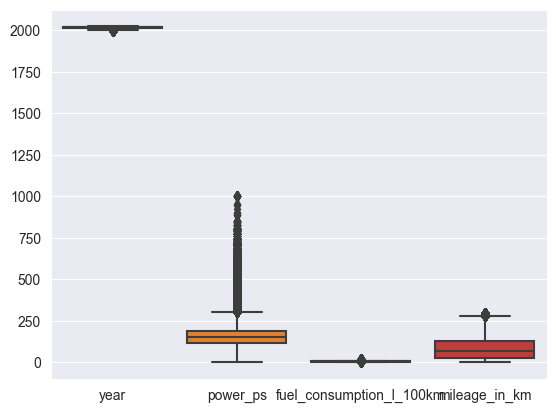

In [88]:
sns.boxplot(data = new_cars.drop('price_in_euro', axis = 1))

detect_outliers 

In [89]:
index = detect_outliers(new_cars , 0 , ['power_ps','fuel_consumption_l_100km','mileage_in_km'])
len(index)

36689

In [90]:
new_cars.drop(index,inplace=True)

C:\Users\Kyrillos\AppData\Local\Temp\ipykernel_14880\1056153545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_cars.drop(index,inplace=True)


split data into input and output

In [91]:
x = cars.drop(['price_in_euro' , 'car_status'] , axis = 1)
y = cars['price_in_euro']

dealing with categorical data

In [92]:
x = pd.get_dummies(x, drop_first=True, dtype=int)
x

,year,power_ps,fuel_consumption_l_100km,mileage_in_km,brand_aston-martin,brand_audi,brand_bentley,brand_bmw,brand_cadillac,brand_chevrolet,...,transmission_type_Manual,transmission_type_Semi-automatic,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Electric,fuel_type_Ethanol,fuel_type_Hybrid,fuel_type_Hydrogen,fuel_type_LPG,fuel_type_Petrol
0,1995,201,10.9,160.500,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1995,260,6.6,190.000,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1995,150,6.6,129.000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1995,150,9.5,189.500,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,1996,179,7.2,96.127,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243600,2023,261,3.5,1.229,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
243601,2023,235,7.6,4.900,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
243602,2023,197,4.7,1.531,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
243603,2023,179,3.5,1.500,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


split data into train and test

In [93]:
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size = 0.2, random_state = 42)

feature scaling

In [94]:
sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [95]:
x_train_scaled = pd.DataFrame(x_train_scaled , columns = sc.get_feature_names_out())
x_train_scaled

,year,power_ps,fuel_consumption_l_100km,mileage_in_km,brand_aston-martin,brand_audi,brand_bentley,brand_bmw,brand_cadillac,brand_chevrolet,...,transmission_type_Manual,transmission_type_Semi-automatic,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Electric,fuel_type_Ethanol,fuel_type_Hybrid,fuel_type_Hydrogen,fuel_type_LPG,fuel_type_Petrol
0,-0.393085,-0.573707,-0.144107,-0.142862,-0.032937,-0.307147,-0.046384,-0.296255,-0.025748,-0.028226,...,1.063626,-0.035784,-0.730998,-0.043752,-0.157208,-0.005996,-0.22428,-0.018553,-0.068977,0.867390
1,-0.943465,0.048764,0.148240,0.826938,-0.032937,-0.307147,-0.046384,3.375474,-0.025748,-0.028226,...,-0.940180,-0.035784,1.367993,-0.043752,-0.157208,-0.005996,-0.22428,-0.018553,-0.068977,-1.152884
2,0.157294,-0.573707,-0.436455,-0.455146,-0.032937,-0.307147,-0.046384,-0.296255,-0.025748,-0.028226,...,1.063626,-0.035784,-0.730998,-0.043752,-0.157208,-0.005996,-0.22428,-0.018553,-0.068977,0.867390
3,0.340754,0.222239,-0.436455,0.153479,-0.032937,-0.307147,-0.046384,-0.296255,-0.025748,-0.028226,...,-0.940180,-0.035784,1.367993,-0.043752,-0.157208,-0.005996,-0.22428,-0.018553,-0.068977,-1.152884
4,-0.576545,-0.573707,-0.485179,-0.373279,-0.032937,-0.307147,-0.046384,3.375474,-0.025748,-0.028226,...,1.063626,-0.035784,1.367993,-0.043752,-0.157208,-0.005996,-0.22428,-0.018553,-0.068977,-1.152884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194702,0.524214,1.365137,0.635486,-0.447367,-0.032937,-0.307147,-0.046384,-0.296255,-0.025748,-0.028226,...,-0.940180,-0.035784,-0.730998,-0.043752,-0.157208,-0.005996,-0.22428,-0.018553,-0.068977,0.867390
194703,-1.677304,1.018186,2.145948,-0.179863,-0.032937,-0.307147,-0.046384,-0.296255,-0.025748,-0.028226,...,-0.940180,-0.035784,-0.730998,-0.043752,-0.157208,-0.005996,-0.22428,-0.018553,-0.068977,0.867390
194704,0.157294,-0.420641,-0.387730,-0.223225,-0.032937,-0.307147,-0.046384,-0.296255,-0.025748,-0.028226,...,-0.940180,-0.035784,1.367993,-0.043752,-0.157208,-0.005996,-0.22428,-0.018553,-0.068977,-1.152884
194705,0.524214,-0.634934,-0.192832,-0.068372,-0.032937,-0.307147,-0.046384,-0.296255,-0.025748,-0.028226,...,1.063626,-0.035784,-0.730998,-0.043752,-0.157208,-0.005996,-0.22428,-0.018553,-0.068977,0.867390


In [96]:
x_test_scaled = pd.DataFrame(x_test_scaled , columns = sc.get_feature_names_out())
x_test_scaled

,year,power_ps,fuel_consumption_l_100km,mileage_in_km,brand_aston-martin,brand_audi,brand_bentley,brand_bmw,brand_cadillac,brand_chevrolet,...,transmission_type_Manual,transmission_type_Semi-automatic,fuel_type_Diesel,fuel_type_Diesel Hybrid,fuel_type_Electric,fuel_type_Ethanol,fuel_type_Hybrid,fuel_type_Hydrogen,fuel_type_LPG,fuel_type_Petrol
0,1.074593,-0.328801,0.099516,-1.135581,-0.032937,-0.307147,-0.046384,-0.296255,-0.025748,-0.028226,...,1.063626,-0.035784,-0.730998,-0.043752,-0.157208,-0.005996,-0.224280,-0.018553,-0.068977,0.867390
1,0.524214,1.161048,-0.144107,-0.570691,-0.032937,-0.307147,-0.046384,-0.296255,-0.025748,-0.028226,...,-0.940180,-0.035784,1.367993,-0.043752,-0.157208,-0.005996,-0.224280,-0.018553,-0.068977,-1.152884
2,-0.943465,-0.726774,-0.144107,0.713412,-0.032937,-0.307147,-0.046384,-0.296255,-0.025748,-0.028226,...,1.063626,-0.035784,1.367993,-0.043752,-0.157208,-0.005996,-0.224280,-0.018553,-0.068977,-1.152884
3,1.074593,-0.828818,-0.387730,-0.867633,-0.032937,-0.307147,-0.046384,-0.296255,-0.025748,-0.028226,...,1.063626,-0.035784,-0.730998,-0.043752,-0.157208,-0.005996,-0.224280,-0.018553,-0.068977,0.867390
4,0.524214,0.181421,-0.631353,-0.405051,-0.032937,-0.307147,-0.046384,-0.296255,-0.025748,-0.028226,...,-0.940180,-0.035784,1.367993,-0.043752,-0.157208,-0.005996,-0.224280,-0.018553,-0.068977,-1.152884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48672,0.707673,1.987608,-1.167323,-0.942194,-0.032937,3.255773,-0.046384,-0.296255,-0.025748,-0.028226,...,-0.940180,-0.035784,-0.730998,-0.043752,-0.157208,-0.005996,4.458711,-0.018553,-0.068977,-1.152884
48673,-0.026166,0.069173,0.732935,-0.362277,-0.032937,-0.307147,-0.046384,-0.296255,-0.025748,-0.028226,...,-0.940180,-0.035784,-0.730998,-0.043752,-0.157208,-0.005996,-0.224280,-0.018553,-0.068977,0.867390
48674,0.524214,0.283466,0.927833,-0.694372,-0.032937,-0.307147,-0.046384,-0.296255,-0.025748,-0.028226,...,-0.940180,-0.035784,-0.730998,-0.043752,-0.157208,-0.005996,-0.224280,-0.018553,-0.068977,0.867390
48675,0.707673,1.987608,1.853600,-0.866988,-0.032937,-0.307147,-0.046384,-0.296255,-0.025748,-0.028226,...,-0.940180,-0.035784,-0.730998,-0.043752,-0.157208,-0.005996,-0.224280,-0.018553,-0.068977,0.867390
